### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [70]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [9]:
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [16]:
wine.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [71]:
wine=wine.dropna()

In [4]:
wine['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [5]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [72]:
X=wine.drop(columns='type')
y=wine['type']

In [73]:
#labels encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
#knn classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [21]:
#accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.945862335653519

###APPLYING STRANDARDIZATION AND PCA ON THE DATASET

In [75]:
#standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [76]:
#pca
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [25]:
X_train.shape

(5170, 12)

In [26]:
#KNN
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9891724671307038

In [77]:
# Access explained variance of each principal component
explained_variance = pca.explained_variance_

print("Explained variance of each principal component:")
for i, var in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {var:.4f}")#eigen values

Explained variance of each principal component:
Principal Component 1: 3.0386
Principal Component 2: 2.6244
Principal Component 3: 1.6350
Principal Component 4: 1.0828
Principal Component 5: 0.8547
Principal Component 6: 0.6677
Principal Component 7: 0.5661
Principal Component 8: 0.5047
Principal Component 9: 0.4621
Principal Component 10: 0.3045
Principal Component 11: 0.2284
Principal Component 12: 0.0334


In [78]:
pca.components_#eigenvectors

array([[-2.56782402e-01, -3.93716674e-01,  1.42705246e-01,
         3.22901972e-01, -3.12551683e-01,  4.22138378e-01,
         4.75975761e-01, -8.41828104e-02, -2.04234242e-01,
        -3.00844960e-01, -6.39752017e-02,  9.26192833e-02],
       [ 2.67990206e-01,  1.01451970e-01,  1.47352492e-01,
         3.44316561e-01,  2.68119444e-01,  1.04021681e-01,
         1.35782010e-01,  5.57786094e-01, -1.58898078e-01,
         1.28775748e-01, -4.92062523e-01, -2.85296601e-01],
       [ 4.60127388e-01, -2.89381533e-01,  5.88248241e-01,
        -7.82154960e-02,  4.10419549e-02, -1.00190905e-01,
        -1.02027032e-01, -6.20803603e-02, -4.01785595e-01,
         1.71701467e-01,  2.17540994e-01,  2.96924519e-01],
       [-1.50816988e-01, -7.90388268e-02,  5.78991759e-02,
         8.76071809e-02,  1.93629964e-01,  3.15679043e-01,
         1.38661080e-01,  1.36649323e-01,  4.71245923e-01,
         5.83629144e-01,  7.64648894e-02,  4.65178930e-01],
       [ 1.65950132e-01,  1.45471514e-01, -2.3501303

In [79]:
pca.components_.shape

(12, 12)

In [80]:
pca.explained_variance_ratio_

array([0.25317044, 0.21865362, 0.13622006, 0.09021639, 0.0712126 ,
       0.05563041, 0.04716989, 0.0420543 , 0.03849992, 0.0253665 ,
       0.01902702, 0.00277884])

In [81]:
import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.25317044, 0.47182406, 0.60804412, 0.69826051, 0.76947312,
       0.82510352, 0.87227342, 0.91432771, 0.95282764, 0.97819414,
       0.99722116, 1.        ])

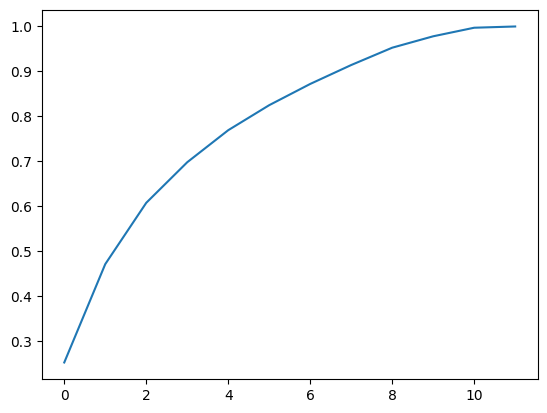

In [82]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [83]:
for i in range (1,12):
    pca=PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn=KNeighborsClassifier()
    knn.fit(X_train_trf,y_train)
    y_pred=knn.predict(X_test_trf)
    print(accuracy_score(y_test,y_pred))

0.9783449342614076
0.9814385150812065
0.9814385150812065
0.9853054911059551
0.9853054911059551
0.988399071925754
0.988399071925754
0.988399071925754
0.9891724671307038
0.9891724671307038
0.9891724671307038


In [84]:
#pca 3d visualization
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [85]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


0.9814385150812065


In [86]:
import plotly.express as px
y_train=y_train.astype(str)
fig=px.scatter_3d(wine,x=X_train[:,0],y=X_train[:,1],z=X_train[:,2],color=y_train,color_continuous_scale='Viridis',opacity=0.8)
fig.update_layout(margin=dict(l=20,r=20,b=20,t=20))
fig.show()